In [3]:
# suppress warnings
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# The plotting tool we will be using in this course
import matplotlib.pyplot as plt

# Module essential for data organization and manipulation
import numpy as np #numpy's "nickname" is np

# Import a function from BrainIAK to simulate fMRI data
import brainiak.utils.fmrisim as sim

# display the plots inline
%matplotlib inline
# autosave for every 5 secs
%autosave 5

Autosaving every 5 seconds


In [4]:
# Set the size (in terms of X, Y, Z) of the volume we want to create
dimensions = np.asarray([64, 64, 64])

# Generate an anatomical image with the size above of brain voxels in gray matter
# This outputs variables for two versions of the image, binary (mask) and probabilistic (template)
mask, template = sim.mask_brain(dimensions, mask_self=False)

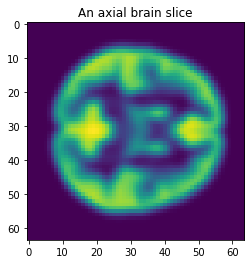

In [6]:
# Get an axial (a.k.a. transverse or horizontal) slice halfway through the brain
mid_idx = dimensions[2] // 2
axial_slice = template[:, :, mid_idx]

# imshow can visualize a 2d array
plt.imshow(axial_slice)
plt.title('An axial brain slice');

In [7]:
# Load in the new variable
from niwidgets import NiftiWidget
import nibabel as nib

template_nii = nib.Nifti1Image(template, np.eye(4))
viewer = NiftiWidget(template_nii)
viewer.nifti_plotter();

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=31, continuous_update=False, description='x', max=63), IntSlider(value=3…

In [8]:
help(sim.mask_brain)

Help on function mask_brain in module brainiak.utils.fmrisim:

mask_brain(volume, template_name=None, mask_threshold=None, mask_self=True)
    Mask the simulated volume
    This creates a mask specifying the approximate likelihood that a voxel is
    part of the brain. All values are bounded to the range of 0 to 1. An
    appropriate threshold to isolate brain voxels is >0.2. Critically,
    the data that should be used to create a template shouldn't already be
    masked/skull stripped. If it is then it will give in accurate estimates
    of non-brain noise and corrupt estimations of SNR.
    
    Parameters
    ----------
    
    volume : multidimensional array
        Either numpy array of a volume or a tuple describing the dimensions
        of the mask to be created
    
    template_name : str
        What is the path to the template to be loaded? If empty then it
        defaults to an MNI152 grey matter mask. This is ignored if mask_self
        is True.
    
    mask_threshol